# Bubulu-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'BBL'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [22]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_komplex.bef_nr,
           t_Obj.individuum,
           t_komplex.bef_art,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# Anzahl Scherben:
# df.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

In [23]:
# GE
df.loc[df['Anzahl'] == 1].pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)  # Anzahl GE

Typ
BBL        34.0
BBL (?)    24.0
All        58.0
Name: objID, dtype: float64

In [24]:
# ausgezählte Scherben
df.loc[df['Anzahl'] != 1].pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
BBL    3.0
All    3.0
Name: Anzahl, dtype: float64

In [25]:
df_pivot = df.pivot_table(values = 'objID', index = ['bef_art', 'Ort', 'bef_nr'], columns = 'Typ', aggfunc = len, margins = True)
df_pivot

Typ                                  BBL  BBL (?)   All
bef_art Ort               bef_nr                       
Grube   Maluba (Fpl. 230) 85/1-3-1   1.0      NaN   1.0
                          85/103     1.0      NaN   1.0
Oberfl  Bobulu (Fpl. 198) 85/101     9.0      6.0  15.0
                          85/102    11.0      4.0  15.0
        Boyoka (Fpl. 196) 85/101    10.0      5.0  15.0
        Ebeka (Fpl. 197)  85/101     2.0      2.0   4.0
        Maluba (Fpl. 230) 85/101     NaN      2.0   2.0
        Maoko (Fpl. 207)  85/101     1.0      1.0   2.0
        Nzambi (Fpl. 205) 85/101     NaN      4.0   4.0
All                                 35.0     24.0  59.0

In [26]:
len(df_pivot.index)-1   # Anzahl der FdSt mit DON-Keramik -1 (für die Summenzeile in der Tab. oben)

9

## Technologische Merkmale (*fabrics*)

In [27]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%BBL%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [28]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


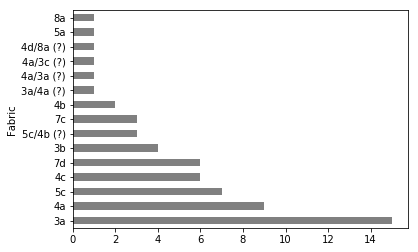

In [29]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [30]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head(7))

,Anzahl,Prozent
Fabric,,
3a,15,24.590164
4a,9,14.754098
5c,7,11.475410
4c,6,9.836066
7d,6,9.836066
3b,4,6.557377
5c/4b (?),3,4.918033


In [31]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungDichte,,
viel,23,37.704918
mittel,21,34.426230
sehr viel,8,13.114754
wenig,4,6.557377
,3,4.918033
<1,1,1.639344
Mittel,1,1.639344


In [32]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungGröße,,
C,28,45.901639
M,25,40.983607
VC,4,6.557377
,3,4.918033
F,1,1.639344


In [33]:
df.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)

MagerungArt
                    3
S                  42
S/Gl                3
S/Gl/Laterit        2
S/Laterit           8
S/Org               2
S/rote Partikel     1
Name: Anzahl, dtype: int64

### Brennfarbe

In [34]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%BBL%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,11,17.460317
Sonstig,28,44.444444
Weiß,24,38.095238


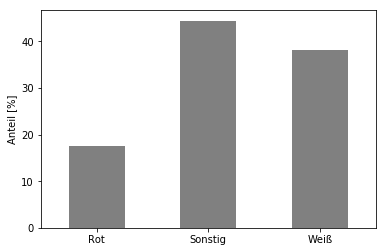

In [35]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [36]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

bg       54
g        38
s        17
bg bg    13
br        4
          3
g g       3
bg g      2
g br      1
s bg      1
dtype: int64

### Oberfläche der Scherben

In [37]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%BBL%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Obfl
glatt         35
leicht rau    21
rau            2
Name: Anzahl, dtype: int64

### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


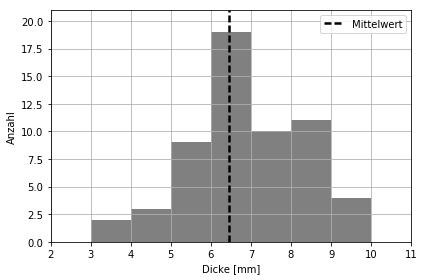

In [38]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%BBL%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
plt.ylim([0,21])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [39]:
df['Wandung'].describe()

count    58.000000
mean      6.448276
std       1.557916
min       3.000000
25%       6.000000
50%       6.000000
75%       7.750000
max      10.000000
Name: Wandung, dtype: float64

In [40]:
df['Wandung'].var()

2.4271022383545073

## Fragmentierung

In [41]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Art,
           t_Obj.Gr_Clist,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Gr_Clist) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [42]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Gr_Clist', aggfunc = np.sum)
df_pivot['>200'] = 0.
df_pivot = pd.DataFrame(df_pivot)
# Prozent-Anteil der Verzierungselemente errechnen
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
#df_pivot = df_pivot.rename(index={500: '>200'})
df_pivot

,Anzahl,Prozent
Gr_Clist,,
30,4.0,6.896552
70,43.0,74.137931
120,10.0,17.241379
200,1.0,1.724138
>200,0.0,0.000000


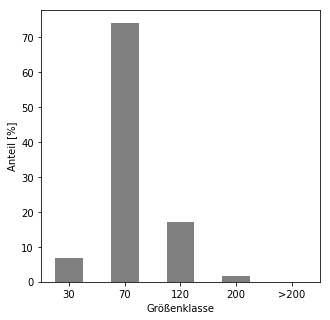

In [43]:
df_pivot.plot(y = 'Prozent', kind = 'bar',legend = False, color = 'grey', figsize = (5,5))
plt.xticks(rotation=0)
plt.xlabel('Größenklasse')
plt.ylabel('Anteil [%]')
# plt.title('Fragmentierungsgrad\n')
plt.savefig('../output/figs/3-1-1-6_Bobulu-Gruppe_KeramikFragmentierung.pdf', bbox_inches='tight')
plt.show()

## Gefäßformen

In [44]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BBL%')
           AND ((t_Obj.Form_Gef) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# die Fragezeichen bei Gef-Form einfach löschen
# df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
# display(df.head())

In [45]:
a = pd.Series({'sicher':len(df.loc[df['Form_Gef'].str.contains(" ")].index),
               'fraglich':len(df.loc[~df['Form_Gef'].str.contains(" |/")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,15,48.387097
sicher,16,51.612903


In [46]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


Anzahl der Stücke, welche der 'Dongo'-Gruppe zugewiesen werden könne und bei denen eine Gefäßeform ermittelt werden konnte:

In [47]:
df_pivot['objID'].sum()

33

Verteilung der Gefäßformen der 'Mokelo'-Gruppe:

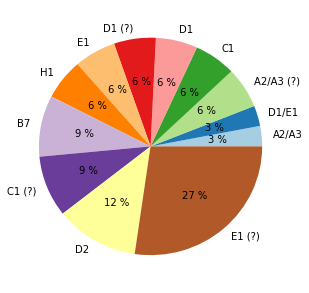

In [48]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

> **Abb. #** Bobulu-Gruppe: Gefäßformen.

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


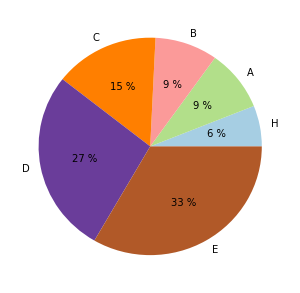

In [49]:
# alles hinter der 1. Stelle abschneiden, um nur die Grundform zu haben
df['Form_Gef_GR'] = df['Form_Gef'].map(lambda x: str(x)[:1])

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef_GR', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [50]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

6

### Bauchform

In [51]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BBL%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [52]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,10,41.666667
A2,8,33.333333
A3,2,8.333333
B1/A3,2,8.333333
B1,1,4.166667
D2/A1,1,4.166667


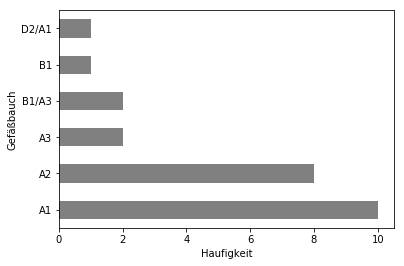

In [53]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')

> **Abb. #** Bobulu-Gruppe: Gefäßbauch

### Korrelation Gef-Form & Bauchform

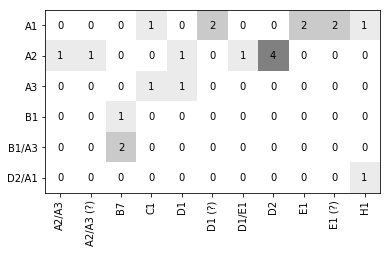

In [54]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Mündungs- & Randformen

In [55]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%BBL%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [56]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M2,23,56.097561
M1,5,12.195122
M3,5,12.195122
M5,3,7.317073
M4,2,4.878049
M6,2,4.878049
M1/M2,1,2.439024


In [57]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

7

> **Tab. #** Bobulu-Gruppe: Mündungsformen

In [58]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head(7))

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
A1,12,26.086957
B2.1,7,15.217391
B1,6,13.043478
B1.1,5,10.869565
B2,5,10.869565
B1/B2,2,4.347826
C3,2,4.347826


> **Tab. #** Bobulu-Gruppe: Randformen

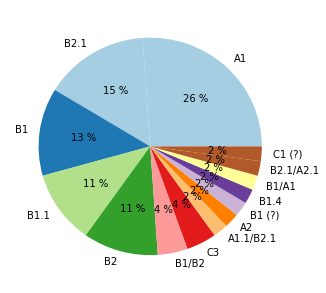

In [59]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [60]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

46

In [61]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

14

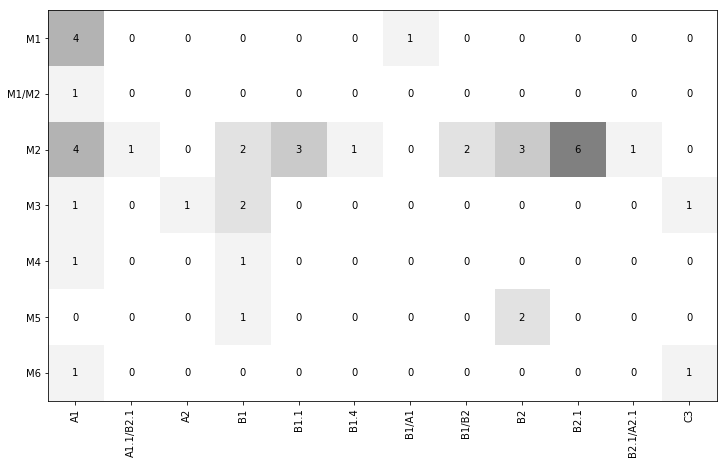

In [62]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
fig = plt.figure()
fig.set_size_inches(12, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

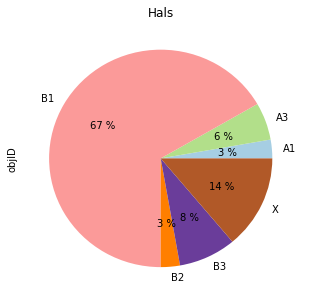

In [63]:
# alles hinter der 2. Stelle abschneiden, um nur die Grundform zu haben
df['Form_Hals_GR'] = df['Form_Hals'].map(lambda x: str(x)[:2])
a = df.loc[~df['Form_Hals_GR'].str.contains("No|na")]

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals_GR', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

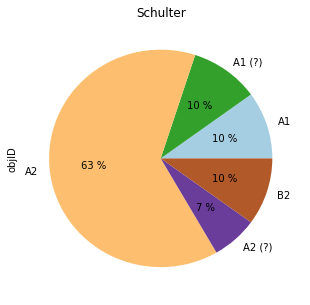

In [64]:
# alles hinter der 2. Stelle abschneiden, um nur die Grundform zu haben
df['Form_Schulter_GR'] = df['Form_Schulter'].map(lambda x: str(x)[:2])
a = df.loc[~df['Form_Schulter_GR'].str.contains("No|na")]

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

### Bodenformen

In [65]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


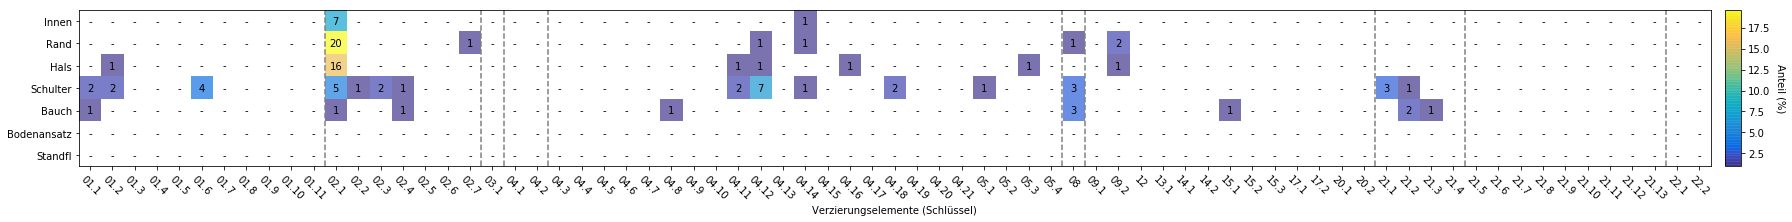

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-6_Bobulu_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [68]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%BBL%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [69]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
#df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

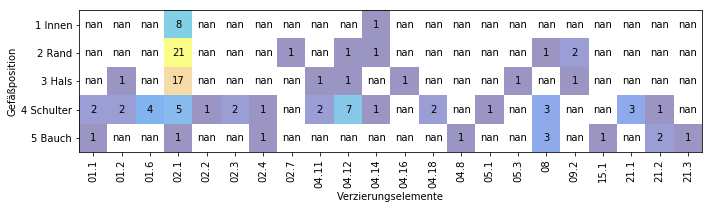

In [70]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap=parula_map, alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-1-6_Bobulu_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [71]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


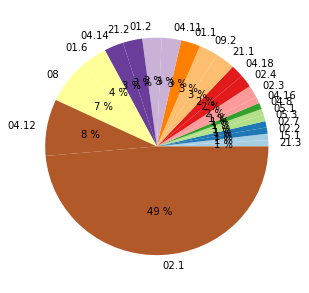

In [72]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')
#plt.title('Mokelo-Gruppe\nGefäßformen')
#plt.savefig('output/3-1-1-3_Mokelo-Gr_GefForm2.pdf')

In [73]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21.")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,7,6.542056
Weitere Verzierungen,100,93.457944


In [74]:
df.loc[df['verzName'].str.contains("21.")]

,objID,posID,verzID,pos,verzName,verzBeschr,Typ,Form_Gef
30,5661,6,23,4 Schulter,21.1,vegetabilisches Roulette/Knotted String,BBL,D2
61,5797,6,23,4 Schulter,21.1,vegetabilisches Roulette/Knotted String,BBL,D1/E1
64,5798,6,23,4 Schulter,21.1,vegetabilisches Roulette/Knotted String,BBL,E1 (?)
66,5799,6,76,4 Schulter,21.2,Twisted String,BBL (?),A2/A3 (?)
67,5799,7,76,5 Bauch,21.2,Twisted String,BBL (?),A2/A3 (?)
69,5800,7,78,5 Bauch,21.3,Alternate Knotted Strip,BBL (?),None
71,5801,7,76,5 Bauch,21.2,Twisted String,BBL (?),None


In [75]:
df.loc[df['verzName'].str.contains("08")]

,objID,posID,verzID,pos,verzName,verzBeschr,Typ,Form_Gef
31,5663,6,22,4 Schulter,08,banfwa-nfwa,BBL,D2
40,5785,6,22,4 Schulter,08,banfwa-nfwa,BBL,A2/A3
42,5785,7,22,5 Bauch,08,banfwa-nfwa,BBL,A2/A3
46,5789,6,22,4 Schulter,08,banfwa-nfwa,BBL,D2
47,5789,7,22,5 Bauch,08,banfwa-nfwa,BBL,D2
58,5794,3,22,2 Rand,08,banfwa-nfwa,BBL,H1
59,5794,7,22,5 Bauch,08,banfwa-nfwa,BBL,H1


## Verbreitung

In [76]:
df = style_mapping_gis_export(style)
df.to_csv("../data/processed/3-1-1-6_"+style+"_Verbreitung.csv", index = False)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
1,Boyoka (Fpl. 196),196,17.898659,1.089931,BBL
2,Ebeka (Fpl. 197),197,18.031148,1.429335,BBL
0,Bobulu (Fpl. 198),198,18.042886,1.441145,BBL
5,Nzambi (Fpl. 205),205,18.637255,3.161920,BBL (?)
4,Maoko (Fpl. 207),207,18.642191,3.407332,BBL
3,Maluba (Fpl. 230),230,18.523706,2.806193,BBL


## Tafeln

In [77]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Bauch,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Hals,Form_Schulter,Form_Bauch,Form_Boden
0,5,3,BYO,85/101,NaN,31,BBL,None,B2.1,B1/C1,,,None
1,5,4,BYO,85/101,NaN,21,BBL,None,A2,B1/C1,,,None
2,5,8,BBL,85/101,NaN,41,BBL,C1 (?),B2.1,B1,A1 (?),,None
3,5,10,BBL,85/101,NaN,29,BBL,E1 (?),A1,B1,,,None
4,6,3,BBL,85/102,NaN,3,BBL,H1,C3,,,A1,None
5,6,4,BBL,85/102,NaN,14,BBL,E1,B1,X,A2,A1,None
6,25,13,MLB,85/1-3-1,NaN,-2:24,BBL,None,A1,,A2,,None
